In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, Dense, LSTM, Reshape, Flatten, ActivityRegularization, GRU

%matplotlib inline
#%config InlineBackend,figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid',palette='muted',font_scale=1.5)

rcParams['figure.figsize']=22,10

In [2]:
data=pd.read_csv(r'C:\Users\sathi\Desktop\Data Science_Projects\Energy_Consumption\AEP_hourly.csv',parse_dates= {"Timestamp" : ["Datetime"]})
#df = pd.read_csv(r'C:\Users\sathi\Desktop\Data Science_Projects\AirQualityUCImodified.csv',
                 #parse_dates= {"Timestamp" : ["Date","Time"]})

In [3]:
data.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Timestamp  121273 non-null  datetime64[ns]
 1   AEP_MW     121273 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 MB


In [5]:
data.isnull().sum()

Timestamp    0
AEP_MW       0
dtype: int64

In [6]:
data.dtypes

Timestamp    datetime64[ns]
AEP_MW              float64
dtype: object

In [7]:
  data = data.set_index('Timestamp')
#df = df.set_index('Timestamp')

In [8]:
data.index

DatetimeIndex(['2004-12-31 01:00:00', '2004-12-31 02:00:00',
               '2004-12-31 03:00:00', '2004-12-31 04:00:00',
               '2004-12-31 05:00:00', '2004-12-31 06:00:00',
               '2004-12-31 07:00:00', '2004-12-31 08:00:00',
               '2004-12-31 09:00:00', '2004-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=121273, freq=None)

In [9]:
data.shape

(121273, 1)

In [10]:
data['hour'] = data.index.hour
data['day_of_month'] = data.index.day
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

<AxesSubplot:xlabel='Timestamp', ylabel='AEP_MW'>

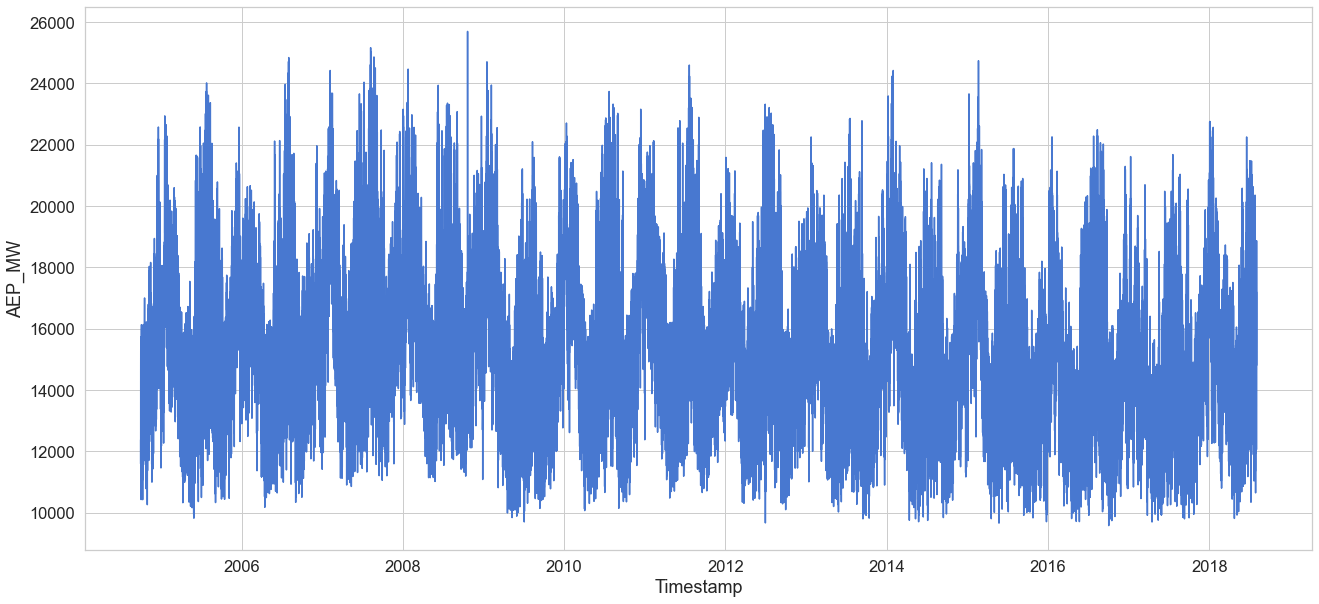

In [11]:
sns.lineplot(x=data.index,y='AEP_MW',data=data)

In [12]:
data.describe

<bound method NDFrame.describe of                       AEP_MW  hour  day_of_month  day_of_week  month
Timestamp                                                           
2004-12-31 01:00:00  13478.0     1            31            4     12
2004-12-31 02:00:00  12865.0     2            31            4     12
2004-12-31 03:00:00  12577.0     3            31            4     12
2004-12-31 04:00:00  12517.0     4            31            4     12
2004-12-31 05:00:00  12670.0     5            31            4     12
...                      ...   ...           ...          ...    ...
2018-01-01 20:00:00  21089.0    20             1            0      1
2018-01-01 21:00:00  20999.0    21             1            0      1
2018-01-01 22:00:00  20820.0    22             1            0      1
2018-01-01 23:00:00  20415.0    23             1            0      1
2018-01-02 00:00:00  19993.0     0             2            1      1

[121273 rows x 5 columns]>

<AxesSubplot:xlabel='Timestamp', ylabel='AEP_MW'>

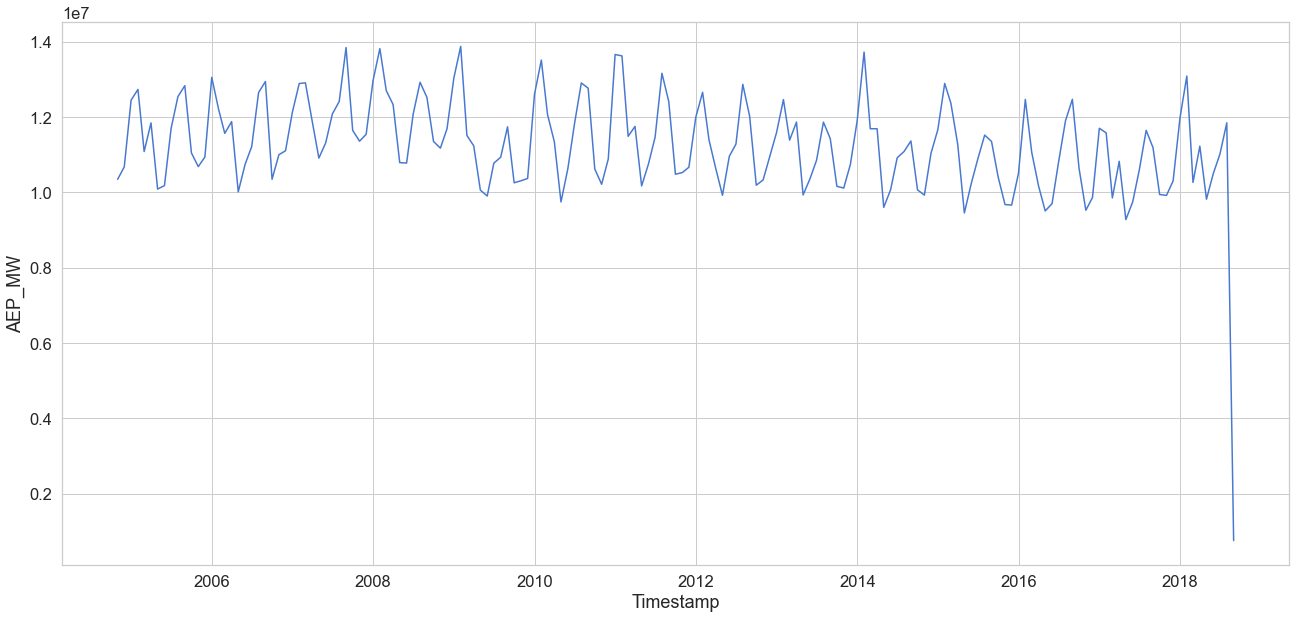

In [13]:
data_by_month=data.resample('M').sum()
sns.lineplot(x=data_by_month.index,y='AEP_MW',data=data_by_month)

<AxesSubplot:xlabel='hour', ylabel='AEP_MW'>

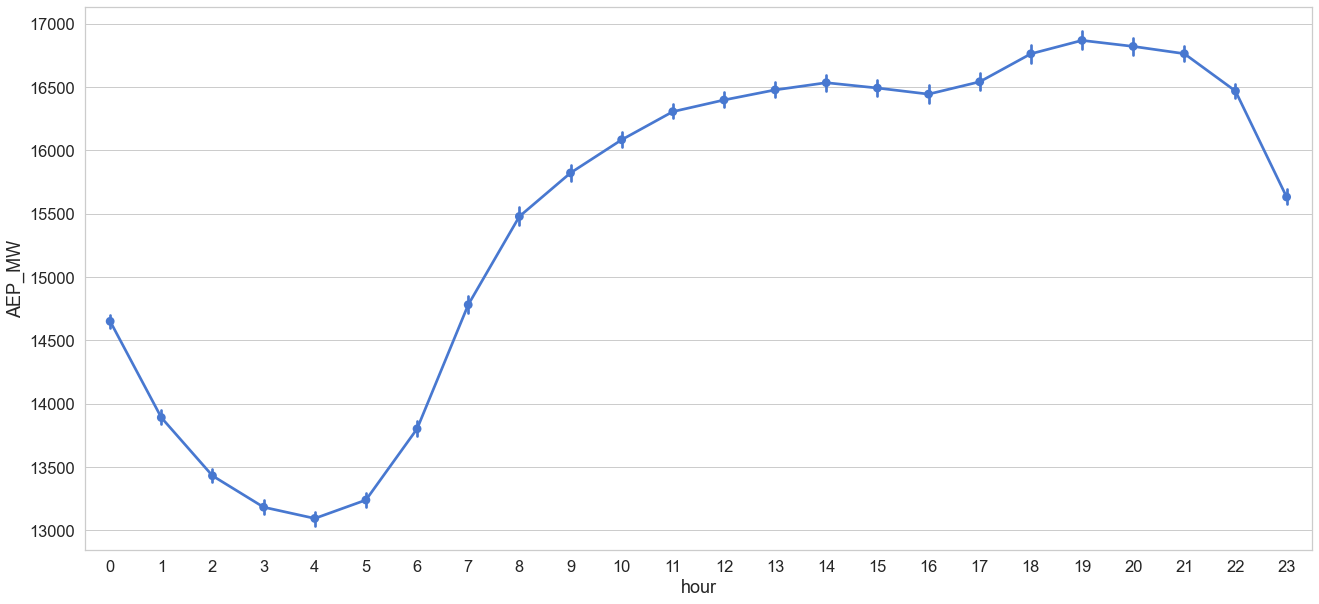

In [14]:
sns.pointplot(data=data,x='hour',y='AEP_MW')

<AxesSubplot:xlabel='day_of_week', ylabel='AEP_MW'>

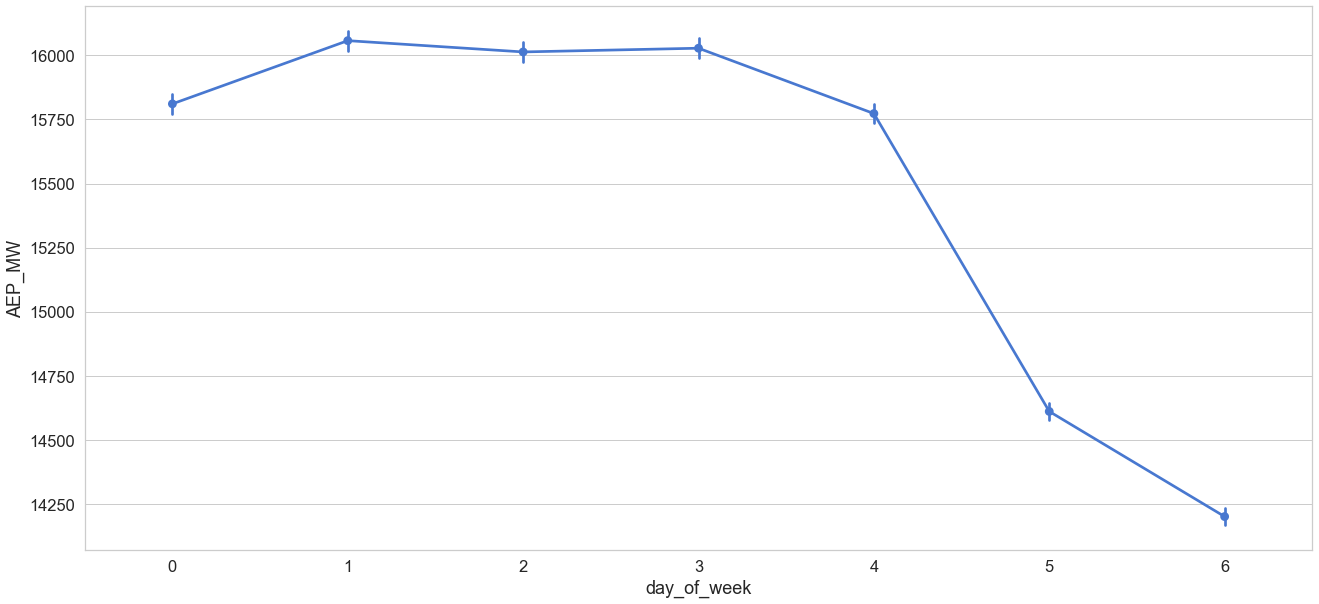

In [15]:
sns.pointplot(data=data,x='day_of_week',y='AEP_MW',)

In [16]:
data.columns

Index(['AEP_MW', 'hour', 'day_of_month', 'day_of_week', 'month'], dtype='object')

In [17]:
data.drop(['hour', 'day_of_month', 'day_of_week', 'month'],axis=1,inplace=True)
#final_dataset.drop(['current_year'],axis=1,inplace=True)

In [18]:
data.columns

Index(['AEP_MW'], dtype='object')

In [19]:
ds=data.values

In [20]:
ds

array([[13478.],
       [12865.],
       [12577.],
       ...,
       [20820.],
       [20415.],
       [19993.]])

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
ds=scaler.fit_transform(ds)

In [22]:
ds

array([[0.24183939],
       [0.20379794],
       [0.18592528],
       ...,
       [0.69746804],
       [0.67233462],
       [0.64614621]])

In [23]:
len(ds)

121273

In [24]:
data.columns

Index(['AEP_MW'], dtype='object')

In [25]:
train_size=int(len(ds)*0.9)
test_size=len(ds)-train_size
train,test=ds[0:train_size,0:1],ds[train_size:len(ds),0:1]

print(train.shape,test.shape)

(109145, 1) (12128, 1)


In [26]:
train.shape

(109145, 1)

In [27]:
def create_dataset(ds,seq_size=1):
    Xs,ys=[],[]
    for i in range(len(ds)-seq_size-1):
        v=ds[i:(i+seq_size),0]
        Xs.append(v)
        ys.append(ds[i+seq_size,0])
    return np.array(Xs),np.array(ys)

In [28]:
seq_size=5

In [29]:
trainX,trainY=create_dataset(train,seq_size)
testX,testY=create_dataset(test,seq_size)

In [30]:
print(trainX.shape)
print(testX.shape)

(109139, 5)
(12122, 5)


In [31]:
print("Shape of training set : {}".format(trainX.shape))
print("Shape of test set : {}".format(testX.shape))

Shape of training set : (109139, 5)
Shape of test set : (12122, 5)


In [32]:
print(type(trainX))

<class 'numpy.ndarray'>


In [33]:
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [34]:
trainX.shape

(109139, 1, 5)

In [35]:
#Single LSTM
model=Sequential()
model.add(LSTM(64,input_shape=(None,seq_size)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                17920     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(trainX, trainY, epochs=100,verbose=2, validation_data=(testX,testY))

Epoch 1/100
3411/3411 - 17s - loss: 0.0016 - accuracy: 9.1626e-06 - val_loss: 7.8846e-04 - val_accuracy: 0.0000e+00
Epoch 2/100
3411/3411 - 12s - loss: 9.4109e-04 - accuracy: 9.1626e-06 - val_loss: 7.9259e-04 - val_accuracy: 0.0000e+00
Epoch 3/100
3411/3411 - 18s - loss: 9.3037e-04 - accuracy: 9.1626e-06 - val_loss: 7.8063e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
3411/3411 - 16s - loss: 9.1604e-04 - accuracy: 9.1626e-06 - val_loss: 7.4616e-04 - val_accuracy: 0.0000e+00
Epoch 5/100
3411/3411 - 12s - loss: 9.1127e-04 - accuracy: 9.1626e-06 - val_loss: 7.3617e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
3411/3411 - 11s - loss: 9.0089e-04 - accuracy: 9.1626e-06 - val_loss: 7.3262e-04 - val_accuracy: 0.0000e+00
Epoch 7/100
3411/3411 - 16s - loss: 9.0003e-04 - accuracy: 9.1626e-06 - val_loss: 7.3545e-04 - val_accuracy: 0.0000e+00
Epoch 8/100
3411/3411 - 12s - loss: 8.9074e-04 - accuracy: 9.1626e-06 - val_loss: 7.2897e-04 - val_accuracy: 0.0000e+00
Epoch 9/100
3411/3411 - 13s - loss: 8.8607e-

Epoch 69/100
3411/3411 - 11s - loss: 7.8102e-04 - accuracy: 9.1626e-06 - val_loss: 7.0458e-04 - val_accuracy: 0.0000e+00
Epoch 70/100
3411/3411 - 12s - loss: 7.8094e-04 - accuracy: 9.1626e-06 - val_loss: 6.8180e-04 - val_accuracy: 0.0000e+00
Epoch 71/100
3411/3411 - 12s - loss: 7.7731e-04 - accuracy: 9.1626e-06 - val_loss: 7.0887e-04 - val_accuracy: 0.0000e+00
Epoch 72/100
3411/3411 - 13s - loss: 7.7648e-04 - accuracy: 9.1626e-06 - val_loss: 6.7192e-04 - val_accuracy: 0.0000e+00
Epoch 73/100
3411/3411 - 13s - loss: 7.7583e-04 - accuracy: 9.1626e-06 - val_loss: 6.6488e-04 - val_accuracy: 0.0000e+00
Epoch 74/100
3411/3411 - 16s - loss: 7.7089e-04 - accuracy: 9.1626e-06 - val_loss: 6.7298e-04 - val_accuracy: 0.0000e+00
Epoch 75/100
3411/3411 - 11s - loss: 7.7107e-04 - accuracy: 9.1626e-06 - val_loss: 6.7595e-04 - val_accuracy: 0.0000e+00
Epoch 76/100
3411/3411 - 18s - loss: 7.7181e-04 - accuracy: 9.1626e-06 - val_loss: 6.7315e-04 - val_accuracy: 0.0000e+00
Epoch 77/100
3411/3411 - 12s - l

In [37]:
trainprediction=model.predict(trainX)
testprediction=model.predict(testX)

In [38]:
trainprediction=scaler.inverse_transform(trainprediction)
trainY=scaler.inverse_transform([trainY])
testprediction=scaler.inverse_transform(testprediction)
testY=scaler.inverse_transform([testY])

In [39]:
import math
from sklearn.metrics import mean_squared_error
train_score=math.sqrt(mean_squared_error(trainY[0],trainprediction[:,0]))
test_score=math.sqrt(mean_squared_error(testY[0],testprediction[:,0]))

In [40]:
print(train_score)
print(test_score)

443.60433582945086
426.1184416749559


In [41]:
trainpredictplot=np.empty_like(ds)
trainpredictplot[:,:]=np.nan
trainpredictplot[seq_size:len(trainprediction)+seq_size,:]=trainprediction

In [42]:
testpredictplot=np.empty_like(ds)
testpredictplot[:,:]=np.nan
testpredictplot[seq_size:len(testprediction)+seq_size,:]=testprediction

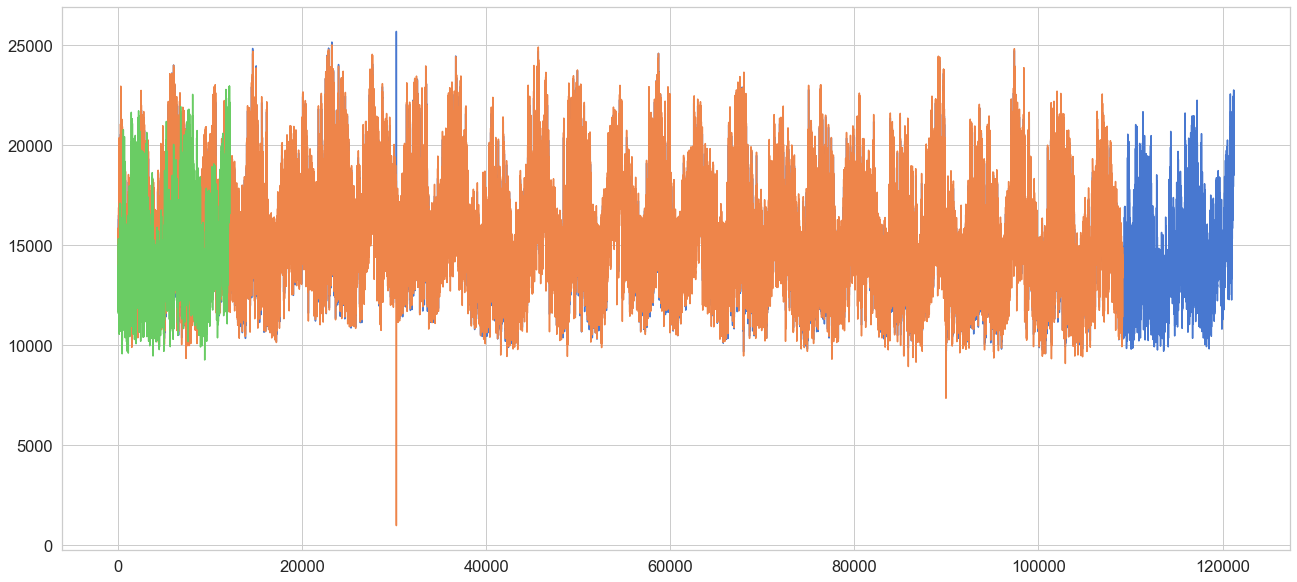

In [44]:
plt.plot(scaler.inverse_transform(ds))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [46]:
model.save('Hourlymodellstm.h5')